<a href="https://colab.research.google.com/github/magomeda228/Deep-Learning/blob/main/FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from tqdm.notebook import tqdm
from IPython.display import clear_output

plt.rcParams.update({'font.size': 16})
sns.set_style('whitegrid')
np.random.seed(0xFA1AFE1)

In [2]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2025-01-14 15:24:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.txt.zip’

data.txt.zip            [     <=>            ] 201.24M  37.4MB/s    in 5.9s    

2025-01-14 15:24:16 (34.0 MB/s) - ‘data.txt.zip’ saved [211011981]



In [6]:
df = pd.read_csv('data.txt.zip', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


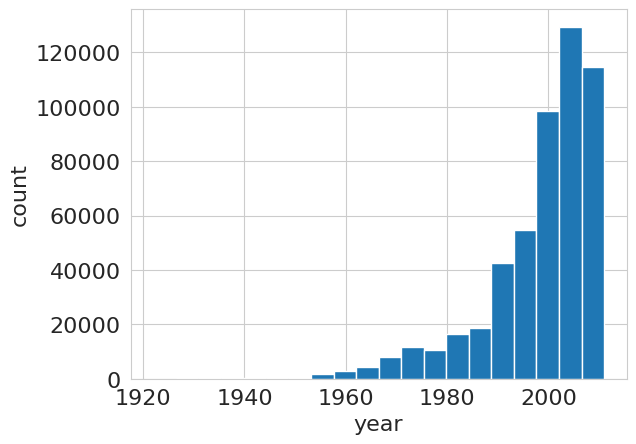

Range: 1922 - 2011
Unique values: 89


In [ ]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()
print(f'Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}')
print(f'Unique values: {np.unique(df.iloc[:, 0]).size}')

In [242]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

In [243]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

89.74966397222076

Константный прогноз

In [9]:
best_constant = np.mean(y_train)
y_pred_constant = np.full_like(y_test, best_constant)
mean_squared_error(y_test, y_pred_constant)

117.83191164028968

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xE2E4)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [332]:
def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    '''
    Plot losses and metrics while training
      - train_losses: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    '''
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label='val')
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label='train')
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label='val')

    if max(train_losses) / min(train_losses) > 10:
        axs[0].set_yscale('log')

    if max(train_metrics) / min(train_metrics) > 10:
        axs[0].set_yscale('log')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    axs[0].set_ylabel('loss')
    axs[1].set_ylabel('MSE')
    plt.show()


def train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader,
                       num_epochs, device=None, verbose=True, plot_every=5):
    '''
    Train and validate neural network
      - model: neural network to train
      - optimizer: optimizer chained to a model
      - criterion: loss function class
      - metric: function to measure metric (e.g., MSE or accuracy)
      - train_loader: DataLoader with train set
      - val_loader: DataLoader with validation set
      - num_epochs: number of epochs to train
      - device: computation device ('cuda' or 'cpu')
      - verbose: whether to plot metrics during training
      - plot_every: number of epochs between plotting
    Returns:
      - train_metric: training metric over the last epoch
      - val_metric: validation metric after the last epoch
    '''
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss, running_metric = 0, 0
        pbar = tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}') if verbose else train_loader

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()

            with torch.no_grad():
                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.size(0)
                running_metric += metric_value * X_batch.size(0)

            if verbose and i % 100 == 0:
                pbar.set_postfix({'loss': loss.item(), 'metric': metric_value})

        train_losses.append(running_loss / len(train_loader.dataset))
        train_metrics.append(running_metric / len(train_loader.dataset))

        model.eval()
        running_loss, running_metric = 0, 0
        pbar = tqdm(val_loader, desc=f'Validating {epoch}/{num_epochs}') if verbose else val_loader

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            with torch.no_grad():
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)
                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.size(0)
                running_metric += metric_value * X_batch.size(0)

            if verbose and i % 100 == 0:
               pbar.set_postfix({'loss': loss.item(), 'metric': metric_value})

        val_losses.append(running_loss / len(val_loader.dataset))
        val_metrics.append(running_metric / len(val_loader.dataset))

        if verbose and epoch % plot_every == 0:
            plot_losses(train_losses, train_metrics, val_losses, val_metrics)
            #print(f"val_losses:  {val_losses}, val_metrics: {val_metrics},\n")

        if (verbose==False or verbose==True) and epoch==num_epochs:
          print(f'Final Validation Metric: {val_metrics[-1]:.3f}')

    return train_metrics[-1], val_metrics[-1]

In [14]:
from torch.utils.data import TensorDataset
import torch.optim as optim
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()
y_train_encoded = label.fit_transform(y_train)
y_val_encoded = label.transform(y_val)

X_train_tensor, X_val_tensor = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_val, dtype=torch.float32)
y_train_tensor, y_val_tensor = torch.tensor(y_train, dtype=torch.long), torch.tensor(y_val, dtype=torch.long)

In [ ]:
dataset = TensorDataset(X_train_tensor, torch.tensor(y_train_encoded, dtype=torch.long))
dataset_valid = TensorDataset(X_val_tensor, torch.tensor(y_val_encoded, dtype=torch.long))

In [58]:
class ExNet(nn.Module):
  def __init__(self, input_size, output_size, hidden_size=128):
    super(ExNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x  # Выход будет логитами

input_size = X_train.shape[1]
hidden_size = 128
num_classes = len(np.unique(y_train))

model = ExNet(input_size, hidden_size, num_classes)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=3e-4)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(dataset_valid, batch_size=32, shuffle=True)
mse_metrics = lambda preds, labels: torch.mean((torch.argmax(preds, dim=1).float() - labels.float())**2)

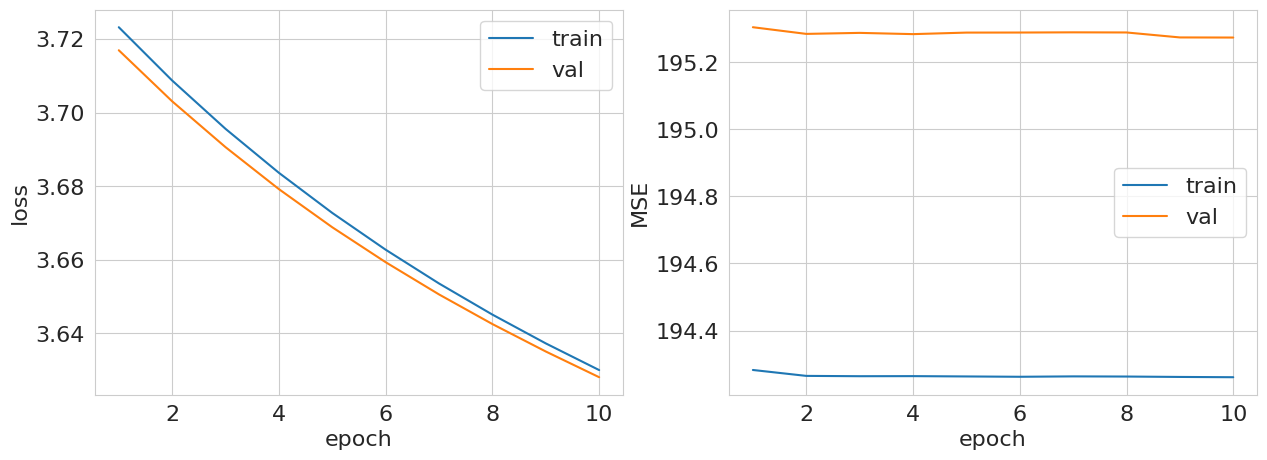

Validation MSE: 195.274


(194.26084151796312, 195.27381580682075)

In [ ]:
train_and_validate(model, optimizer, criterion, mse_metrics, train_loader, valid_loader, num_epochs = 10)

За бейзлайн можно взять epoch=6 когда Mse находится на низком уровне еще и значение loss функции снижается
Но на предикте с помощью Ridge() модели l2 регуляризации MSE значение самое низкое из константного оценивания и dl модели


In [111]:
import torch.nn.init as init

In [233]:
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 1)  # Выход один нейрон
        )

    def forward(self, x):
        return self.model(x)

model = RegressionModel(input_size=X_train.shape[1])

In [ ]:

X_train_tensor, X_val_tensor = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_val, dtype=torch.float32)
y_train_tensor, y_val_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1), torch.tensor(y_val, dtype=torch.float32).reshape(-1, 1)

In [ ]:
dataset = TensorDataset(X_train_tensor, y_train_tensor)
dataset_valid = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(dataset_valid, batch_size=32, shuffle=False)

In [ ]:
for X_batch, y_batch in train_loader:
    preds = model(X_batch)
    print(f"preds shape: {preds.shape}, y_batch shape: {y_batch.shape}")
    print(f"preds dtype: {preds.dtype}, y_batch dtype: {y_batch.dtype}")
    loss = criterion(preds, y_batch)
    print(f"Loss: {loss.item()}")
    break

preds shape: torch.Size([32, 1]), y_batch shape: torch.Size([32, 1])
preds dtype: torch.float32, y_batch dtype: torch.float32
Loss: 4934420.5


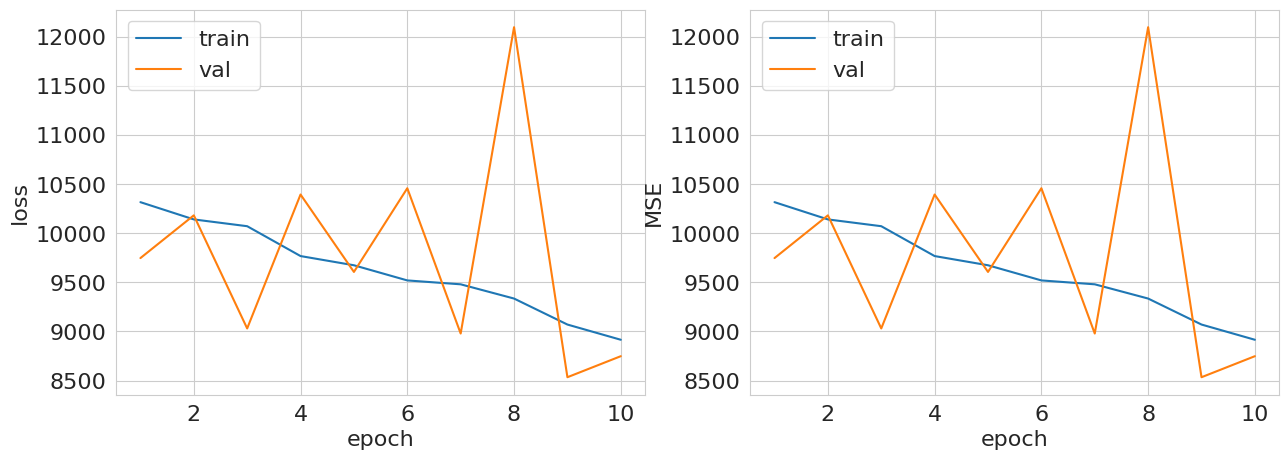

Validation MSE: 8748.011


(8915.330911582576, 8748.01120700647)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
mse_metrics = lambda preds, labels: torch.mean((preds - labels)**2)
train_and_validate(model, optimizer, criterion, mse_metrics, train_loader, valid_loader, num_epochs = 10)

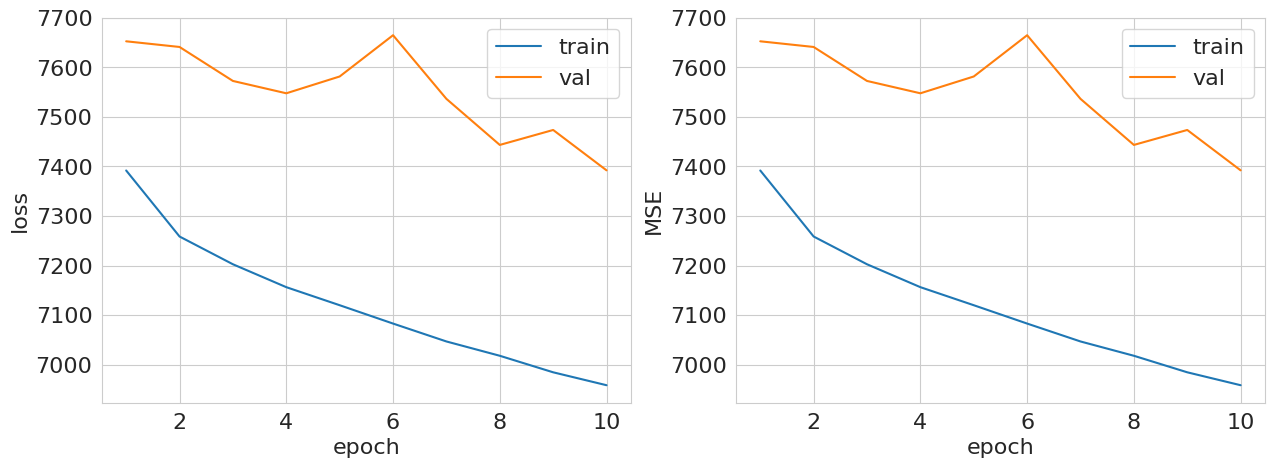

Validation MSE: 7392.191


(6958.674742773287, 7392.191281606315)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
mse_metrics = lambda preds, labels: torch.mean((preds - labels)**2)
train_and_validate(model, optimizer, criterion, mse_metrics, train_loader, valid_loader, num_epochs = 10)

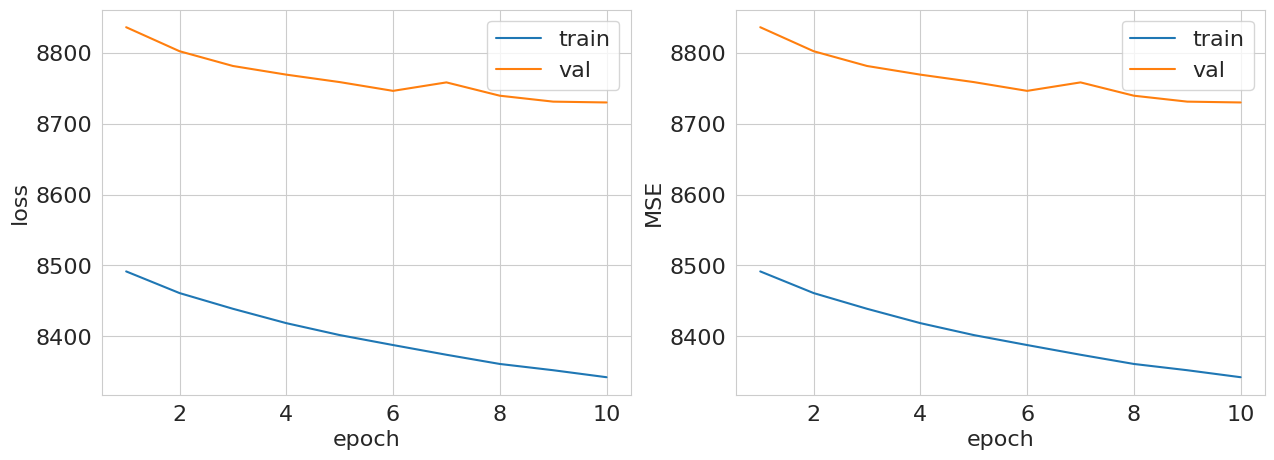

Validation MSE: 8730.244


(8342.085279899204, 8730.243560884817)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
mse_metrics = lambda preds, labels: torch.mean((preds - labels)**2)
train_and_validate(model, optimizer, criterion, mse_metrics, train_loader, valid_loader, num_epochs = 10)

In [191]:
def normalize(tensor, y_min, y_max):
    '''
    Min-max normalization for PyTorch tensors
    '''
    if y_max == y_min:
        return torch.zeros_like(tensor, dtype=torch.float)
    return (tensor - y_min) / (y_max - y_min)

# def denormalize(sample, y_min, y_max):
#     '''
#     #Denormalize sample from [0, 1] to initial range
#     '''
#     return [(x * (y_max - y_min)) + y_min for x in sample]

In [246]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

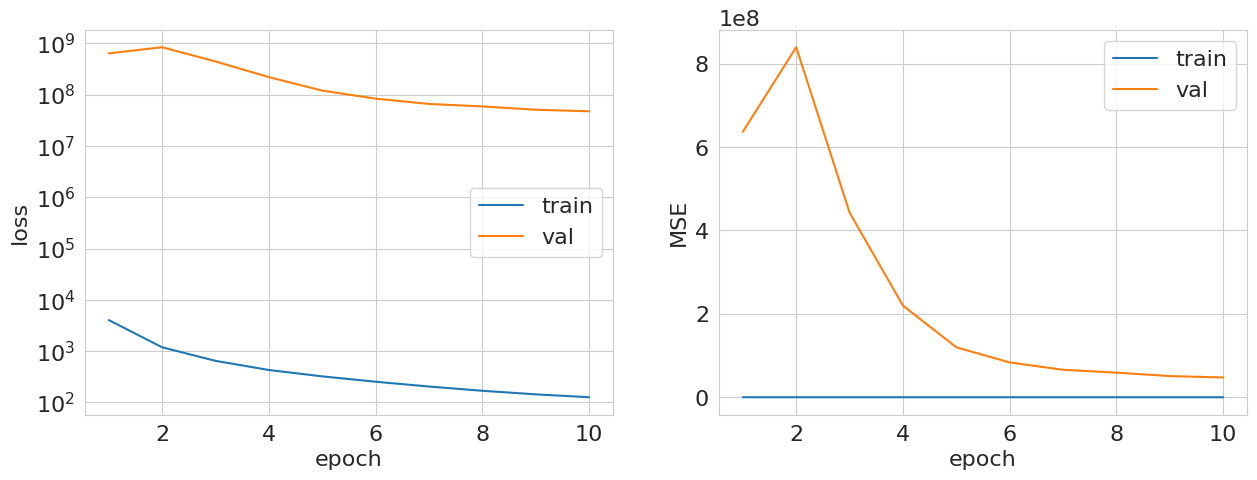

Final Validation Metric: 47379802.901


(126.48977171018724, 47379802.90065417)

In [255]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_train_tensor, y_val_tensor = torch.tensor(y_train, dtype=torch.float).view(-1,1), torch.tensor(y_val, dtype=torch.float).view(-1,1)

y_min, y_max = y_train_tensor.min(), y_train_tensor.max()

y_train_normalized, y_val_normalized = normalize(y_train_tensor, y_min, y_max), normalize(y_val_tensor, y_min, y_max)

model = RegressionModel(input_size=X_train_tensor.shape[1])

ataset = TensorDataset(X_train_tensor, y_train_normalized)
dataset_valid = TensorDataset(X_val_tensor, y_val_normalized)

optimizer = optim.Adam(model.parameters(), lr=1e-4)
criterion = torch.nn.MSELoss()

train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(dataset_valid, batch_size=32, shuffle=True)
mse_metrics = lambda preds, labels: torch.mean((preds - labels)**2)

train_and_validate(model, optimizer, criterion, mse_metrics, train_loader, valid_loader, num_epochs=10)

Видно что после нормализации целевой перемнной значение loss функции ведет себя стабильно в процессе и валидации и снижается до порядка 100 на обучении и 10^7 на валидации, вместе с mse в виду нормализации само знаечние метрики на порядок уменьшилось, как на обучении так и на валидации (до макимум 200 на обучении и валидации)

In [36]:
from sklearn.preprocessing import StandardScaler

In [235]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

In [264]:
class RegressionModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(RegressionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )
    #     self._initialize_weights()

    # def _initialize_weights(self):
    #     for layer in self.model:
    #         if isinstance(layer, nn.Linear):
    #             nn.init.xavier_uniform_(layer.weight)
    #             nn.init.zeros_(layer.bias)

    def forward(self, x):
        return self.model(x)

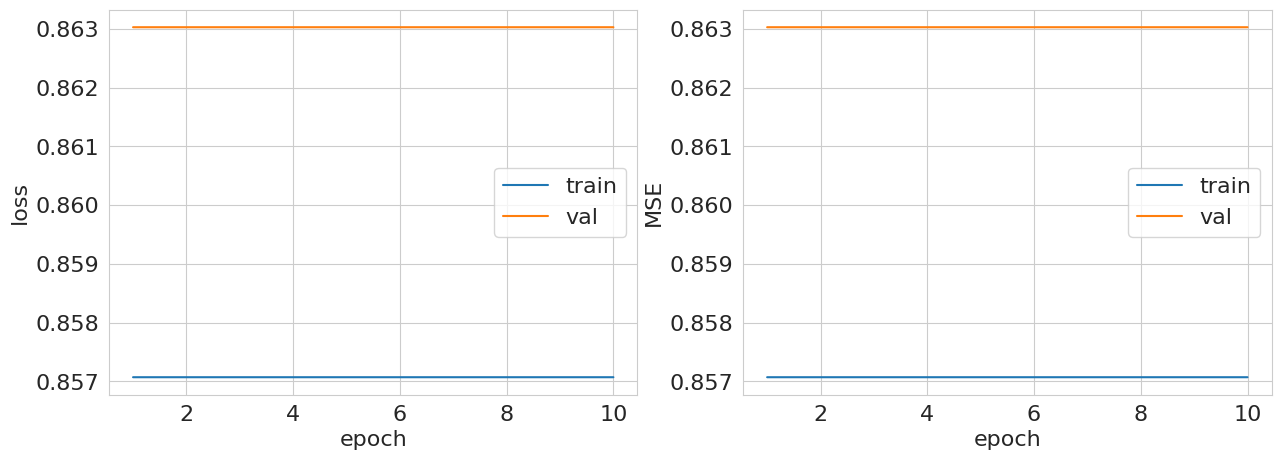

Final Validation Metric: 0.863


(0.8570703071011, 0.8630289199922918)

In [273]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_max, y_min = y_train.max(), y_train.min()
y_train = normalize(y_train, y_max, y_min)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = X_train.numpy() if isinstance(X_train, torch.Tensor) else X_train
X_val = X_val.numpy() if isinstance(X_val, torch.Tensor) else X_val

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

dataset = TensorDataset(X_train_tensor, y_train_tensor)
dataset_valid = TensorDataset(X_val_tensor, y_val_tensor)

optimizer = optim.Adam(model.parameters(), lr=1e-5)
criterion = torch.nn.MSELoss()

model = RegressionModel(input_size=X_train_tensor.shape[1])

train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(dataset_valid, batch_size=32, shuffle=True)
mse_metrics = lambda preds, labels: torch.mean((preds - labels)**2)

train_and_validate(model, optimizer, criterion, mse_metrics, train_loader, valid_loader, num_epochs=10)

После Нормализации целевой переменной и X видно что абсолютные велчиины MSE метрики и Loss функции снизились в 10^3 по сравнению с тем что было без нормализации и приведению к стандартному виду
Стало 0.857/0.863 на обучении и валидации loss функции и mse метрика 0.857/0.863 на обучении и валидации

Проанализируем модель на SGD*monetum

In [278]:
import time

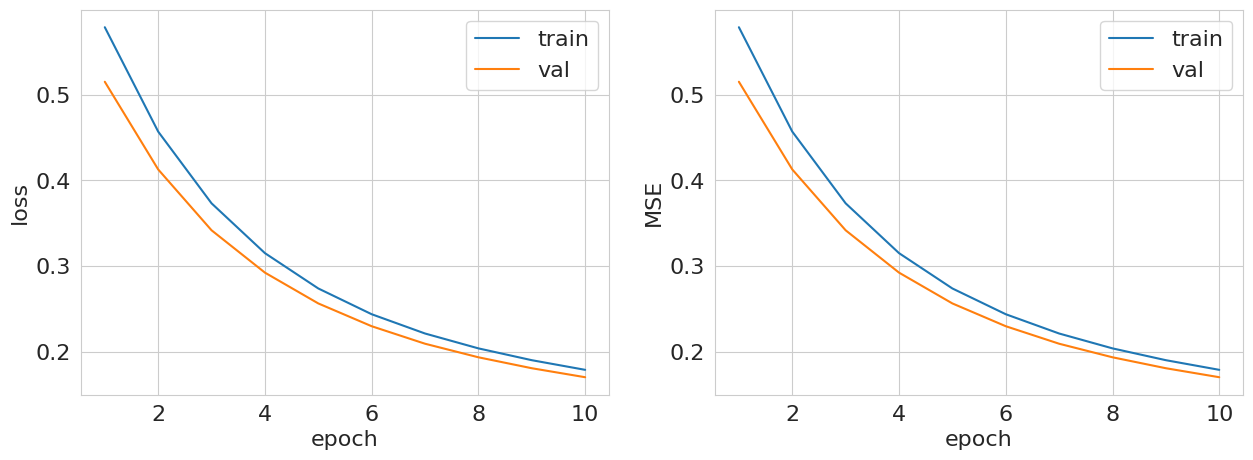

Final Validation Metric: 0.170
Time : 4.752898693084717


In [279]:
model = RegressionModel(input_size=X_train_tensor.shape[1])
optimizer = optim.SGD(model.parameters(), lr=1e-5, momentum=0.9)
start = time.time()
train_and_validate(model, optimizer, criterion, mse_metrics, train_loader, valid_loader, num_epochs=10)
end = time.time()
print(f"Time : {end-start}")

Измерение прошли на поярдко быстрее  (4,5 секунды) так как добавлен параметр оптимазтора в model SGD (и видно как с течением времени модели отлично сходится как на валидации так и обучении) с 0.6 до 0.2 за 10 эпох как mse метрика так и loss (валидация и обучение), модель хорошо сходится, что говорит об отсутсвии переобучения

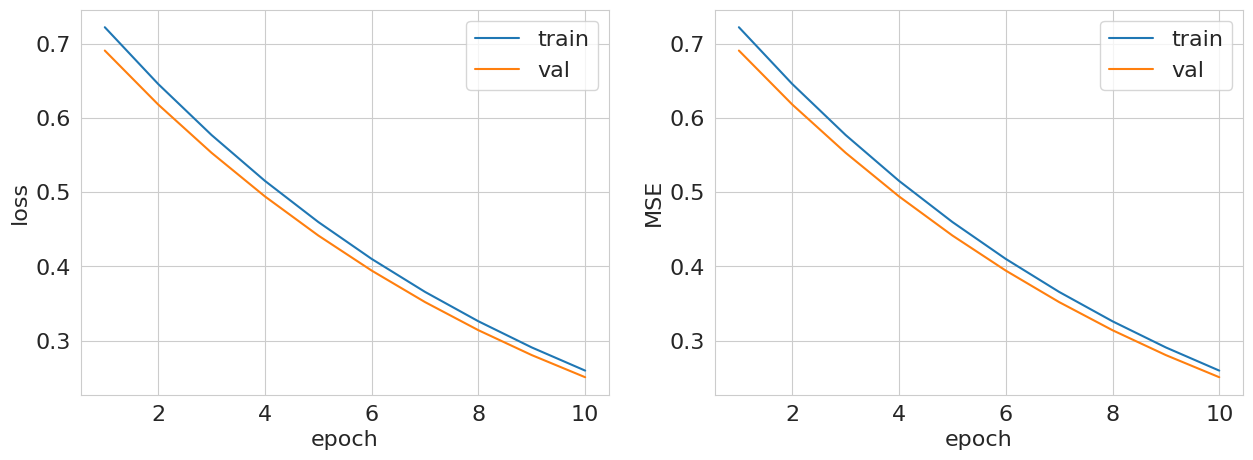

Final Validation Metric: 0.251
Time : 5.163381099700928


In [281]:
model = RegressionModel(input_size=X_train_tensor.shape[1])
optimizer = optim.Adam(model.parameters(), lr=1e-5)
start = time.time()
train_and_validate(model, optimizer, criterion, mse_metrics, train_loader, valid_loader, num_epochs=10)
end = time.time()
print(f"Time : {end-start}")

Adam работает на пол секунды дольше, но метрика mse равномерно снижается от 0.7 до 0.3 за 10 эпох при обучении и валидации, видно что сходится в таком же диапазоне фукнция как на валидации так и обучении
Можно сказать что на SGD momentum схождение идет быстре и функции имеют более вогнутный вид по сравнению с Adam

Построим как выглядит зависмость в отличии от скрытых нейронов

In [285]:
class RegressionModelHidden(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(RegressionModelHidden, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1)
        )

    def forward(self, x):
        return self.model(x)

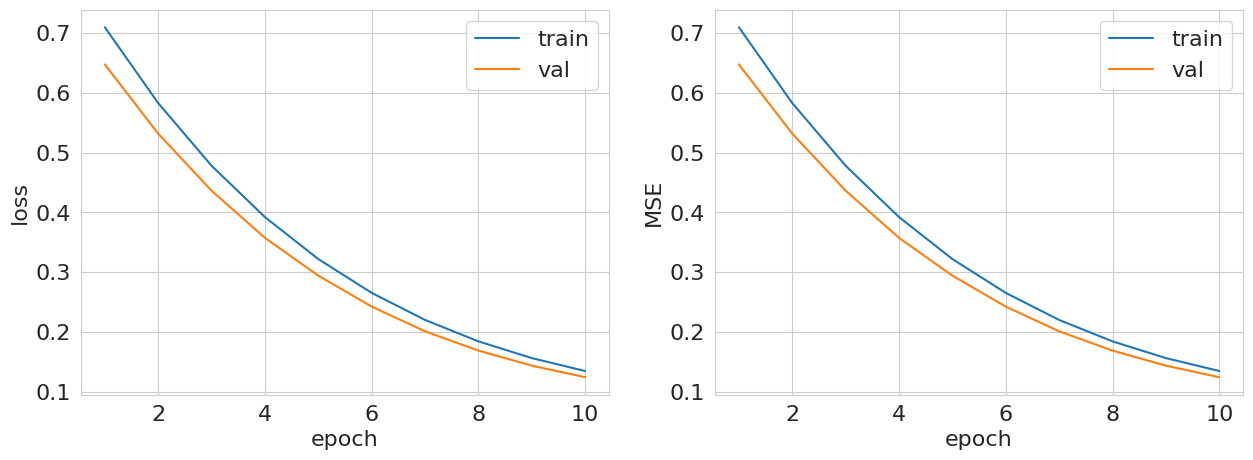

Final Validation Metric: 0.124
Time : 12.347776412963867


In [311]:
  model = RegressionModelHidden(input_size=X_train_tensor.shape[1], hidden_size=256)
  optimizer = optim.Adam(model.parameters(), lr=1e-5)
  start = time.time()
  train_and_validate(model, optimizer, criterion, mse_metrics, train_loader, valid_loader, num_epochs=10)
  end = time.time()
  print(f"Time : {end-start}")

Увеличив число скрытых нейрнов в 2 раза с 128 до 256, сеть начинает со схожих значений mse метрики и loss функции, но под конец обучения на 10 эпохе видно что метрика имеют значения 0.15 и loss функция, но время обучения увеличилось до 12 секунд

In [316]:
class RegressionModelHiddenDeep(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(RegressionModelHiddenDeep, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
        )

    def forward(self, x):
        return self.model(x)

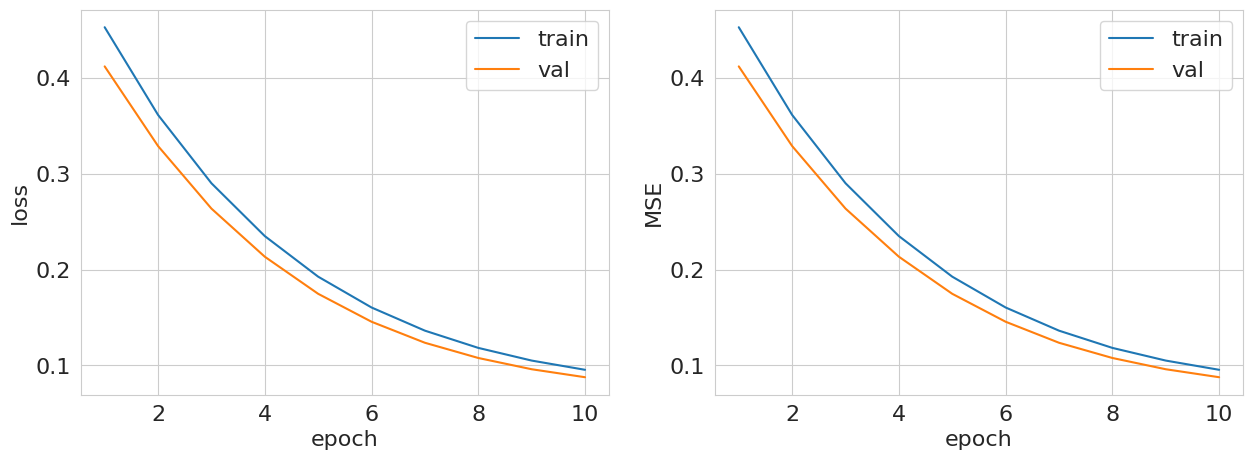

Final Validation Metric: 0.088
Time : 13.966201782226562


In [315]:
model = RegressionModelHidden(input_size=X_train_tensor.shape[1], hidden_size=256)
optimizer = optim.Adam(model.parameters(), lr=1e-5)
start = time.time()
train_and_validate(model, optimizer, criterion, mse_metrics, train_loader, valid_loader, num_epochs=10)
end = time.time()
print(f"Time : {end-start}")

Добавь еще нейронный слой вижно что время обучения увеличлось в 1.5 раза с 5 секунд до 8.5 (но метрика mse стала лучше и сходится как и на валидации так и наобучении вместес с loss функции значением) с 0.5 до 0.1, было 0.7 до 0.3-0.2

In [320]:
class RegressionModelHiddenDeepDroup(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(RegressionModelHiddenDeepDroup, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(hidden_size, 64),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(64, 1),
        )

    def forward(self, x):
        return self.model(x)

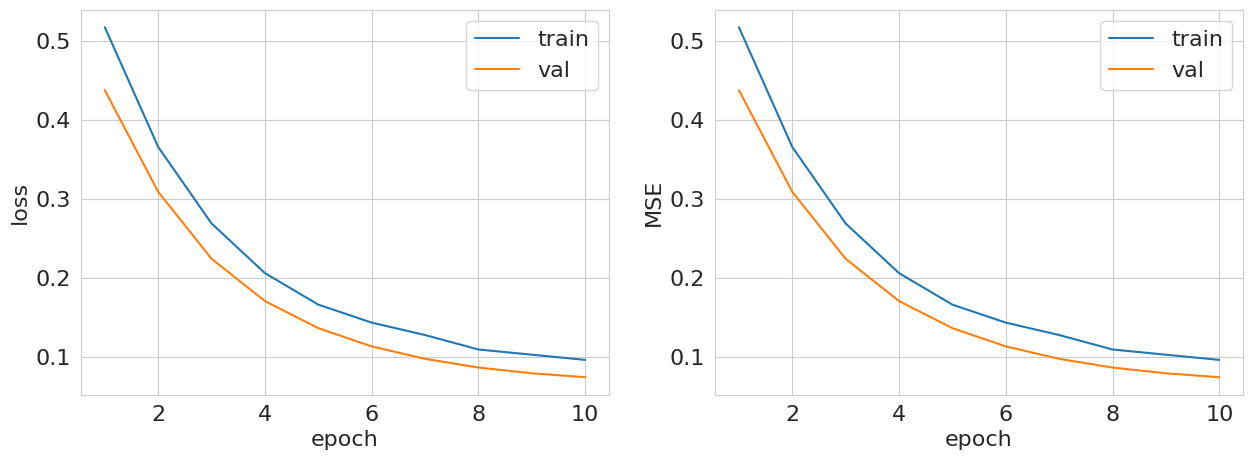

Final Validation Metric: 0.074
Time : 8.853841781616211


In [321]:
model = RegressionModelHiddenDeepDroup(input_size=X_train_tensor.shape[1], hidden_size=256)
optimizer = optim.Adam(model.parameters(), lr=1e-5)
start = time.time()
train_and_validate(model, optimizer, criterion, mse_metrics, train_loader, valid_loader, num_epochs=10)
end = time.time()
print(f"Time : {end-start}")

Добавив cлучайное отключение нейронов для глубокой модели видно что стала лучше обучаться с функция потерь и mse метрика уменьшилась с 0.5 до <0.1 и имеет вогнутный характер, также значение на обучении и валидации больше отличаться ддруг от друга (с 0.25 до 0.5)

In [336]:
for lr in np.logspace(-7,-1,7):
  model = RegressionModelHiddenDeepDroup(input_size=X_train_tensor.shape[1], hidden_size=256)
  optimizer = optim.Adam(model.parameters(), lr=i)
  start = time.time()
  train_and_validate(model, optimizer, criterion, mse_metrics, train_loader, valid_loader, num_epochs=10, verbose=False)
  end = time.time()
  print(f"Time : {end-start}, lr: {lr}")

Final Validation Metric: 0.673
Time : 2.98017954826355, lr: 1e-07
Final Validation Metric: 0.798
Time : 2.909356117248535, lr: 1e-06
Final Validation Metric: 0.649
Time : 2.957258462905884, lr: 1e-05
Final Validation Metric: 0.653
Time : 4.115631341934204, lr: 0.0001
Final Validation Metric: 0.603
Time : 2.9526546001434326, lr: 0.001
Final Validation Metric: 0.728
Time : 2.9804601669311523, lr: 0.01
Final Validation Metric: 0.816
Time : 2.9544832706451416, lr: 0.1


Самый подходящий гиперпарметр learning rate будет 1e-4 так как на нем минимальное значение mse метрики на валидации, что говорит из логарифмичсекого диапазона от 1e-7 до 0.1. Подберем после этого гиперпаметр weight_decay

In [341]:
for weight in np.logspace(-7,0,8):
  model = RegressionModelHiddenDeepDroup(input_size=X_train_tensor.shape[1], hidden_size=256 )
  optimizer = optim.Adam(model.parameters(), lr=1e-4,  weight_decay=weight)
  start = time.time()
  train_and_validate(model, optimizer, criterion, mse_metrics, train_loader, valid_loader, num_epochs=10, verbose=False)
  end = time.time()
  print(f"Time : {end-start}, weight_decay: {weight}")

Final Validation Metric: 0.043
Time : 3.800567388534546, weight_decay: 1e-07
Final Validation Metric: 0.045
Time : 4.105960130691528, weight_decay: 1e-06
Final Validation Metric: 0.040
Time : 3.2504208087921143, weight_decay: 1e-05
Final Validation Metric: 0.037
Time : 3.335723400115967, weight_decay: 0.0001
Final Validation Metric: 0.036
Time : 3.8253095149993896, weight_decay: 0.001
Final Validation Metric: 0.033
Time : 3.9954309463500977, weight_decay: 0.01
Final Validation Metric: 0.033
Time : 3.497110605239868, weight_decay: 0.1
Final Validation Metric: 0.230
Time : 3.1557199954986572, weight_decay: 1.0


Можно сделать вывод что на weight_decay = 1e-5 находится наиболее оптимальное знаечние, так как модель еще не переобучена, об этом можно сделать вывод сутя по величине функции потерь после данной велиины (1e-5) и резкому скачку на weight_decay=0

In [345]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

In [349]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_max, y_min = y_train.max(), y_train.min()
y_train = normalize(y_train, y_max, y_min)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = X_train.numpy() if isinstance(X_train, torch.Tensor) else X_train
X_val = X_val.numpy() if isinstance(X_val, torch.Tensor) else X_val

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

dataset = TensorDataset(X_train_tensor, y_train_tensor)
dataset_valid = TensorDataset(X_val_tensor, y_val_tensor)


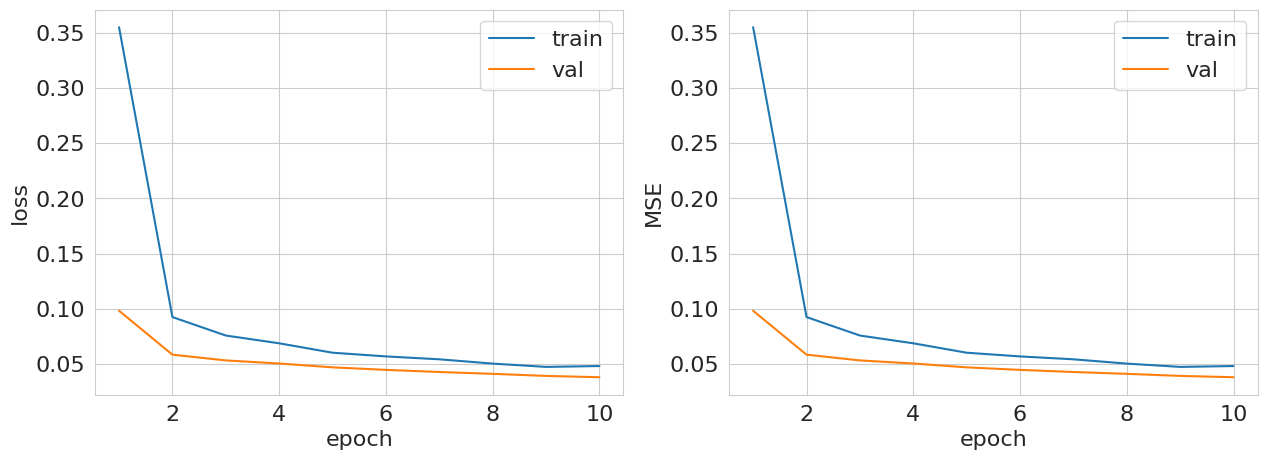

Final Validation Metric: 0.038


In [356]:
model = RegressionModelHiddenDeepDroup(input_size=X_train_tensor.shape[1], hidden_size=256 )
optimizer = optim.Adam(model.parameters(), lr=1e-4,  weight_decay=1e-5)
start = time.time()
train_and_validate(model, optimizer, criterion, mse_metrics, train_loader, valid_loader, num_epochs=10, verbose=True)
end = time.time()

Как видим моедль стала гораздо лучше рабоать с помощью применения случайного отключения нейронов, подбора гиперпараметров таких как шаг обучения и коэфициента регуляризации было выяснено что самое оптимальное это weight_decay=1e-5 и lr=1e-4, также получен итоговый график для модели, что показывает зависимость loss функции и mse от эпох по которым двигается от 0.25 до 0.05 и 0.075 до 0.025 сооттвестнно для обучающей выборки и валидационной